## Parkinson's Disease Detection Project

<p> </p>

<h3> Some information about the dataset: </h3>
<ul>
    Matrix column entries (attributes):
    <li>name - ASCII subject name and recording number</li>
<li>MDVP:Fo(Hz) - Average vocal fundamental frequency</li>
<li>MDVP:Fhi(Hz) - Maximum vocal fundamental frequency</li>
<li>MDVP:Flo(Hz) - Minimum vocal fundamental frequency</li>
<li>MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency</li>
<li>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude</li>
<li>NHR,HNR - Two measures of ratio of noise to tonal components in the voice</li>
<li>status - Health status of the subject (one) - Parkinson's, (zero) - healthy</li>
<li>RPDE,D2 - Two nonlinear dynamical complexity measures</li>
<li>DFA - Signal fractal scaling exponent</li>
<li>spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation</li>
</ul>
<p> Link of the dataset:</p> https://www.kaggle.com/nidaguler/parkinsons-data-set 

<h3> Importing required libraries </h3>

In [1]:
#load all modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read csv file of parkison's dataset
df=pd.read_csv("parkinsons.csv")

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
# checking the columns
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
# checking for any null value in the datset
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
# removing unnecessory features
features = df.drop(['name','status'],axis=1)

#our target will be 'status'
target = df.loc[:,'status']

In [6]:
#scale all the datas in the range between -1,1 using min-max scaler
scaler = MinMaxScaler((-1,1))
features_c = scaler.fit_transform(features)

<h3> Creating the Model: </h3>

In [9]:
#split the dataset into training and testing sets where 20% data for testing purpose.
x_train,x_test,y_train,y_test=train_test_split(features_c, target , test_size=0.2,random_state=10)

In [10]:
#initialize the random forest classifier and fit the dataset
model = RandomForestClassifier(random_state=2)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

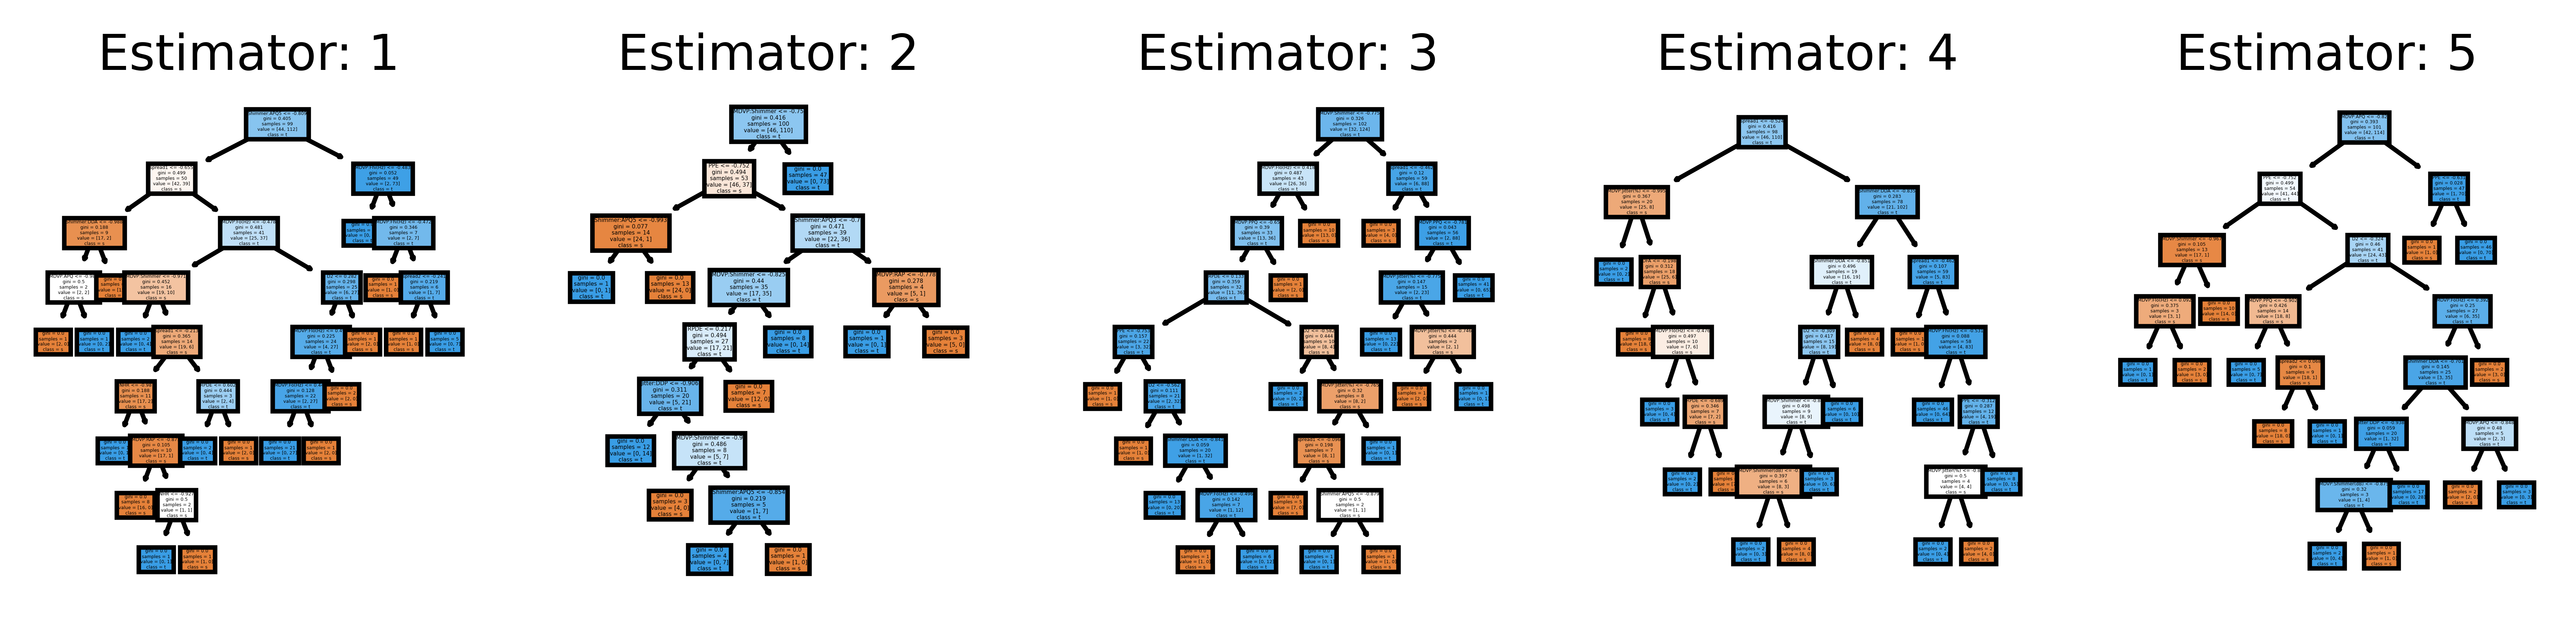

In [11]:
#plot the RandomForestClassifier’s first 5 trees 

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],feature_names= features.columns,
 class_names= 'status',filled = True,ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index+1), fontsize = 11)
fig.savefig('Random Forest 5 Trees.png')

In [12]:
#predict the output for x_test
y_pred=model.predict(x_test)

In [13]:
#calculate accuracy,root mean squared error
print("Accuracy :",accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9743589743589743
Mean Absolute Error: 0.02564102564102564
Root Mean Squared Error: 0.16012815380508713


In [16]:
# saving the model 
import pickle 
filename = 'random_forest_model.sav'
pickle.dump(model, open(filename , 'wb'))

In [17]:
# loading the model
import pickle 
loaded_model = pickle.load(open('random_forest_model.sav', 'rb'))

<h3> Conclusion: </h3>
<ul>
    <li>We have created an ensemble model using Randon Forest algorithm which is giving us the accuracy of 97.4%.</li>

In [ ]:
#input data and transform into numpy array
for i in range(3):
    in_data= np.asarray(tuple(map(float,input("Enter the data:\n").rstrip().split(','))))
    #reshape and scale the input array
    in_data_re = in_data.reshape(1,-1)
    in_data_sca = scaler.transform(in_data_re)

    #print the predicted output for input array
    print("Parkinson's Disease Detected\n" if model.predict(in_data_sca)
          else "No Parkinson's Disease Detected\n")
    
# These features belong to patient suffering from parkinsons disease    
#116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,0.03490,0.04825,0.04465,0.10470,0.01767,19.64900,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335



# # These features belong to a healthy person
# 197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569